In [1]:
import os
import cv2
import random
import numpy as np

from metods import *
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from skimage import morphology
from skimage.io import imread
import numpy as np
import skimage.io
import skimage.color
import skimage.filters
import skimage.measure

import warnings
warnings.filterwarnings('ignore')

In [2]:
IMG_HEIGHT = 128
IMG_WIDTH = 128

img = cv2.imread("C:\\Users\\ugur_\\Python Projects\\LungClassifier\\mask_00001247_001.png", 0)
img2 = cv2.imread("C:\\Users\\ugur_\\Python Projects\\LungClassifier\\mask_00001247_001_hole.png", 0)

img3 = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
img4 = cv2.resize(img2, (IMG_HEIGHT, IMG_WIDTH))

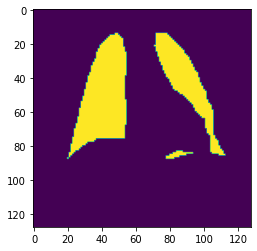

In [3]:
path = "C:\\Users\\ugur_\\Python Projects\\LungClassifier\\mask_00001247_001.png"
mask = readImages(path,  IMG_HEIGHT = 128, IMG_WIDTH = 128, is_gray=0)
plt.imshow(img)

In [9]:
img2 =(img4/255.)* 255.0
dilated = cv2.dilate(img.copy(), None, iterations=3) #gray img
eroded = cv2.erode(dilated.copy(), None, iterations=3) #gray img
_ , binary_img = cv2.threshold(eroded, 120, 255, cv2.THRESH_BINARY) #binary img

In [4]:
def fillHoles(pred_img):
    pred_img = (pred_img/255.)* 255.0
    dilated = cv2.dilate(pred_img.copy(), None, iterations=3) #gray img
    eroded = cv2.erode(dilated.copy(), None, iterations=3) #gray img
    _ , binary_img = cv2.threshold(eroded, 120, 255, cv2.THRESH_BINARY) #binary img
    
    return binary_img

In [35]:
def removeSmallObjects(img, min_area = 200):
    labeled_image, _ = skimage.measure.label(img, connectivity=2, return_num=True)
    
    # compute object features and extract object areas
    object_features = skimage.measure.regionprops(labeled_image)
    object_areas = [objf["area"] for objf in object_features]
    object_areas
    
    min_area = min_area
    large_objects = []
    for objf in object_features:
        if objf["area"] > min_area:
            large_objects.append(objf["label"])
    # print("Found", len(large_objects), "objects!")
    
    for _, objf in enumerate(object_features, start=1):
        if objf["area"] < min_area:
            labeled_image[labeled_image == objf["label"]] = 0
    
    colored_label_image = skimage.color.label2rgb(labeled_image, bg_label=0)
    
    colorChannel1 = colored_label_image[:,:,0]
    colorChannel2 = colored_label_image[:,:,2]
    combinedChannels = colorChannel1 + colorChannel2
    return combinedChannels

In [40]:
b = removeSmallObjects(img4, min_area = 200)
import matplotlib.image
matplotlib.image.imsave('name.png', b, cmap= plt.cm.gray)
#plt.imshow(img)

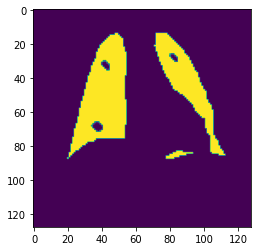

In [8]:
plt.imshow(img4)

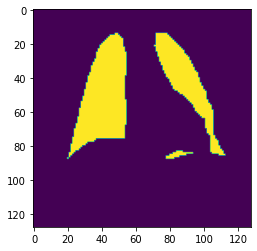

In [7]:
a = fillHoles(img4)
plt.imshow(a)

(-0.5, 127.5, 127.5, -0.5)

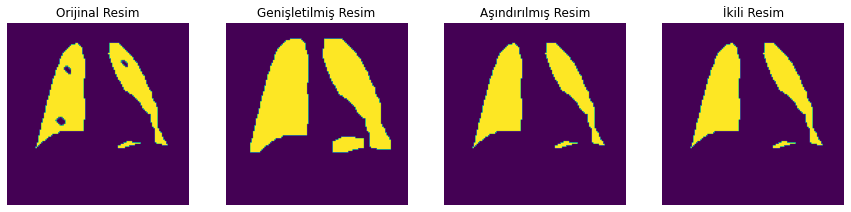

In [10]:
plt.figure(figsize = (15,20))
plt.axis('off')

plt.subplot(1,4,1)
plt.imshow(img4)
plt.title('Orijinal Resim')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(dilated)
plt.title('Genişletilmiş Resim')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(eroded)
plt.title('Aşındırılmış Resim')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(binary_img)
plt.title('İkili Resim')
plt.axis('off')

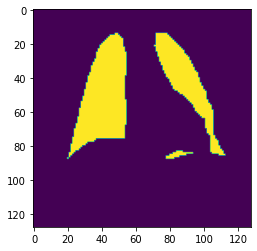

In [63]:
a = fillHoles(img4)
plt.imshow(a)

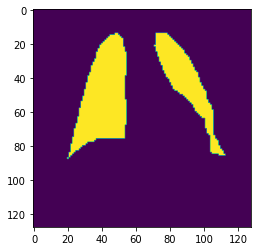

In [66]:
b = removeSmallObjects(a)
plt.imshow(b)